This notebook plots some basic statistics about the growth rate of COVID-19 literature

In [3]:
import time
import tqdm
import numpy
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from indra.literature import pubmed_client

def reldate_to_date(reldate):
    return datetime.today() - timedelta(days=reldate)

In [4]:
search_term = 'COVID-19'
reldates = list(range(450, -1, -5))
dates = [reldate_to_date(rd) for rd in reldates]
data = []
for reldate in tqdm.tqdm(reldates):
    ids = pubmed_client.get_ids(search_term, reldate=reldate, retmax=200000)
    data.append(len(ids))
    time.sleep(0.5)

100%|██████████| 91/91 [01:39<00:00,  1.09s/it]


In [6]:
cum_sum = list(data[0] - numpy.array(data[:-1])) + [data[0]]

In [10]:
date_strs = [date.strftime('%m/%d/%Y') for date in dates]

INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: 

INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: 

INFO: [2021-03-09 17:26:34] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:34] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:34] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:34] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.


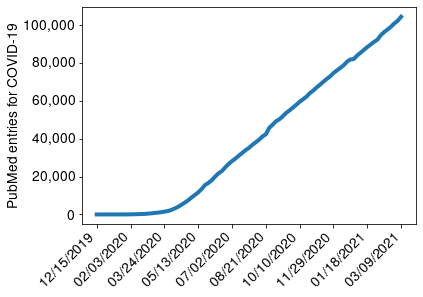

In [28]:
fig = plt.figure()
plt.xticks(ticks=range(0, len(date_strs), 10), labels=date_strs[::10], rotation=45,
           fontsize=14, ha='right')
plt.yticks(fontsize=14)
plt.ylabel('PubMed entries for COVID-19', fontsize=14)
plt.plot(cum_sum, linewidth=4)
fig.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

Taking out the initial ramp up, plot how many papers were published per day

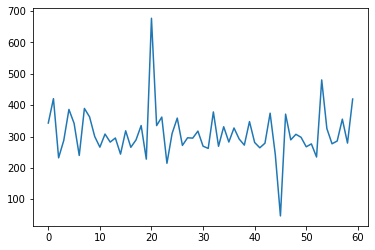

In [76]:
plt.plot(numpy.diff(cum_sum[30:]) / 5)

In [77]:
print('Average number of papers published per day: %d' % numpy.mean(numpy.diff(cum_sum[30:]) / 5))

Average number of papers published per day: 309


In [78]:
print('Total number of papers published so far: %d' % data[0])

Total number of papers published so far: 104436


In [35]:
with open('pubmed_covid19.csv', 'w') as fh:
    for d, n in zip(date_strs, cum_sum):
        fh.write('%s,%s\n' % (d, n))

Now try to get metadata for all the IDs

In [5]:
import os
import time
import tqdm
from indra.util import batch_iter
from indra.literature import pubmed_client
from indra.literature.pubmed_client import get_metadata_for_ids
search_term = 'COVID-19'
all_ids = pubmed_client.get_ids(search_term, retmax=200000)
metadata = {}
for id_batch in tqdm.tqdm(batch_iter(list(all_ids), batch_size=200, return_func=list)):
    md = get_metadata_for_ids(id_batch)
    metadata.update(md)
    time.sleep(0.2)

528it [18:19,  2.08s/it]


In [4]:
metadata

{'33706383': {'pmid': '33706383',
  'pii': 'Swiss Med Wkly. 2021;151:w20482',
  'doi': '10.4414/smw.2021.20482',
  'pmcid': None,
  'title': 'Acute kidney injury in patients with COVID-19: a retrospective cohort study from Switzerland.',
  'authors': ['Diebold', 'Schaub', 'Landmann', 'Steiger', 'Dickenmann'],
  'page': 'w20482',
  'journal_title': 'Swiss medical weekly',
  'journal_abbrev': 'Swiss Med Wkly',
  'issn_list': ['1424-3997', '0036-7672'],
  'journal_nlm_id': '100970884',
  'mesh_annotations': [],
  'publication_date': {'year': 2021, 'month': 3, 'day': 12}},
 '33706377': {'pmid': '33706377',
  'pii': 'ocab029',
  'doi': '10.1093/jamia/ocab029',
  'pmcid': None,
  'title': 'Development and validation of prediction models for mechanical ventilation, renal replacement therapy, and readmission in COVID-19 patients.',
  'authors': ['Rodriguez',
   'Bhave',
   'Chen',
   'Pang',
   'Hripcsak',
   'Sengupta',
   'Elhadad',
   'Green',
   'Adelman',
   'Metitiri',
   'Elias',
   'Gr

In [6]:
import json
with open('metadata.json', 'w') as fh:
    json.dump(metadata, fh, indent=1)

In [8]:
len(metadata)

105369

In [9]:
len([m for m, x in metadata.items() if x['mesh_annotations']])

64980

In [11]:
with_annots = {k: v for k, v in metadata.items() if v['mesh_annotations']}

In [15]:
import datetime
mesh_annot_dates = defaultdict(list)
for md in with_annots.values():
    date = datetime.datetime(year=md['publication_date']['year'],
                             month=md['publication_date']['month'],
                             day=md['publication_date']['day'])
    for ma in md['mesh_annotations']:
        mesh_annot_dates[ma['text']].append(date)

In [20]:
sorted_annots = sorted(mesh_annot_dates.items(), key=lambda x: len(x[1]), reverse=True)

In [72]:
for sa, x in sorted_annots[:100]:
    print(sa, len(x))

Humans 64152
COVID-19 63873
SARS-CoV-2 49707
Pandemics 47089
Coronavirus Infections 39658
Pneumonia, Viral 39465
Betacoronavirus 33038
Female 18580
Male 17815
Middle Aged 12549
Adult 11885
Aged 10042
Young Adult 4485
China 4410
Retrospective Studies 4393
Aged, 80 and over 4261
Adolescent 4102
Risk Factors 3913
Child 3886
United States 3855
COVID-19 Testing 3734
Antiviral Agents 2893
Animals 2877
Clinical Laboratory Techniques 2841
Surveys and Questionnaires 2618
COVID-19 drug treatment 2584
Telemedicine 2556
Hospitalization 2552
Infection Control 2532
Severity of Illness Index 2498
Coronavirus 2438
Italy 2390
Comorbidity 2388
Disease Outbreaks 2338
Cross-Sectional Studies 2331
Treatment Outcome 2201
Health Personnel 2175
Communicable Disease Control 2174
Quarantine 2070
Tomography, X-Ray Computed 2051
Personal Protective Equipment 1871
Lung 1870
Risk Assessment 1837
Public Health 1797
Child, Preschool 1724
COVID-19 Vaccines 1704
Angiotensin-Converting Enzyme 2 1665
Prognosis 1650
Antib

In [113]:
interesting = ['COVID-19 Testing',
               'Antiviral Agents','Hydroxychloroquine',
               'COVID-19 Vaccines', 'Cytokines']

In [116]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas

/Users/ben/.virtualenvs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
<ipython-input-115-d4aadc854a91>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation='45')
/Users/ben/.virtualenvs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
<ipython-input-115-d4aadc854a91>:10: UserWarning: FixedFormatter should only be used to

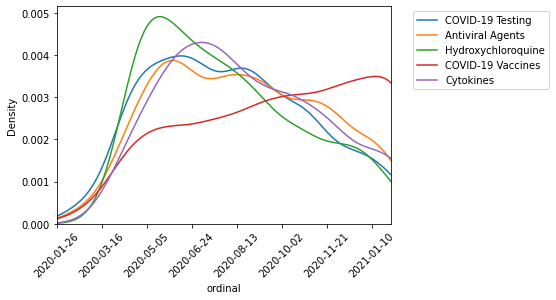

In [115]:
for factor in interesting:
    df = pandas.DataFrame(mesh_annot_dates[factor], columns=['dates'])
    df = df[df.dates > datetime.datetime(2020,1,1)]
    df['ordinal'] = [x.toordinal() for x in df.dates]
    ax = sb.distplot(df.ordinal, hist=False, label=factor)
    plt.xlim(datetime.datetime(2020,1,26).toordinal(), datetime.datetime(2021,2,1).toordinal())
    x_ticks = ax.get_xticks()
    xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks]
    ax.set_xticklabels(xlabels, rotation='45')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')